# **Analisis Sentiment Opini di Twitter tentang Pemilihan Pilkada DKI 2017  menggunakan Support Vector Machine (SVM)**

Nama  : Aris Dwi Wahyudi

Kelas : Fibonacci

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

!pip install sastrawi

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Acquisition

In [ ]:
file_csv = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv')
df = pd.DataFrame(file_csv)
df.tail()

,Id,Sentiment,Pasangan Calon,Text Tweet
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ..."
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...
898,899,positive,Anies-Sandi,#PesanBijak #OkeOce #GubernurGu3 ...
899,900,positive,Anies-Sandi,Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...


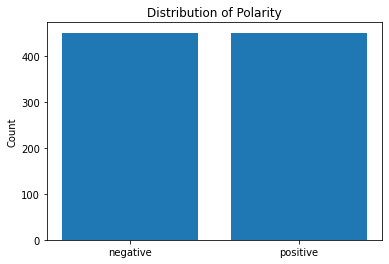

Positive :  450
Negative :  450


In [ ]:
classes = df["Sentiment"].unique()
y_axis = [df[df["Sentiment"] == "positive"].shape[0], df[df["Sentiment"] == "negative"].shape[0]]

# print(classes)
plt.bar(classes, y_axis)
plt.ylabel("Count")
plt.title("Distribution of Polarity")
plt.show()

print("Positive : ", len(df[df["Sentiment"] == "positive"]))
print("Negative : ", len(df[df["Sentiment"] == "negative"]))

### Text Preprocessing

In [ ]:
def cleaning(text):
    text = re.sub("[@#][A-Za-z0-9_]+|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text)
    text = re.sub(r"\d+", "", text)
    return text

df['cleaning'] = df['Text Tweet'].apply(cleaning)
df = df[df['cleaning'].str.replace(" ","") != ""]

**Case Folding**

mengubah seluruh huruf menjadi huruf kecil

In [ ]:
def casefolding(text):
    text = text.lower()
    return text

df['casefolding'] = df['cleaning'].apply(casefolding)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Tokenizing**

Tokenization untuk merubah kalimat jadi kata

In [ ]:
def tokenizing(text):
    token = text.split()
    return token

df['tokenizing'] = df['casefolding'].apply(tokenizing)

**Filtering (Stopword)**

mengambil kata-kata penting dari hasil token dengan membuang kata kurang penting

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_ = stopwords.words('indonesian')

def filtering(token):
    filter_ = [t for t in token if t not in stopwords_]
    return filter_

df['filtering'] = df['tokenizing'].apply(filtering)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Stemming**

menghilangkan infleksi kata ke bentuk dasarnya

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(filtered_token):
    stemmed_sentence = stemmer.stem(' '.join(t for t in filtered_token))
    return stemmed_sentence

df['stemming'] = df['filtering'].apply(stemming)

In [ ]:
def preprocessing_text(text):
  text = cleaning(text)
  text = casefolding(text)
  text = tokenizing(text)
  text = filtering(text)
  text = stemming(text)
  return text

In [ ]:
#!pip install swifter #Install swifter. digunakan untuk meningkatkan kecepatan proses pandas
!pip install swifter
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 2.1 MB/s 
     |████████████████████████████████| 281 kB 65.3 MB/s 
     |████████████████████████████████| 1.6 MB 43.1 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=ec674aec3e1da7a579eed45f428c08a14e924ca6b9bfe4fe711a1e8d5689b5f6
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
# Perhatikan waktu komputasi ketika proses text preprocessing
%%time
df['Text'] = df['Text Tweet'].swifter.apply(preprocessing_text)


Pandas Apply:   0%|          | 0/889 [00:00<?, ?it/s]

CPU times: user 244 ms, sys: 6.03 ms, total: 250 ms
Wall time: 273 ms


In [ ]:
df.tail()

,Id,Sentiment,Pasangan Calon,Text Tweet,cleaning,casefolding,tokenizing,filtering,stemming,Text
894,895,positive,Anies-Sandi,"Ingat, pilih no.3 di tanggal 19 April nanti ya...",Ingat pilih no di tanggal April nanti ya ka...,ingat pilih no di tanggal april nanti ya ka...,"[ingat, pilih, no, di, tanggal, april, nanti, ...","[pilih, no, tanggal, april, ya, kakak, ok, hand]",pilih no tanggal april ya kakak ok hand,pilih no tanggal april ya kakak ok hand
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",Kali saja bpk lihat lagi di RSpun tetap s...,kali saja bpk lihat lagi di rspun tetap s...,"[kali, saja, bpk, lihat, lagi, di, rspun, teta...","[kali, bpk, lihat, rspun, selfie, ok, hand]",kali bpk lihat rspun selfie ok hand,kali bpk lihat rspun selfie ok hand
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...,Kita harus dapat merangkul semua orang tanpa b...,kita harus dapat merangkul semua orang tanpa b...,"[kita, harus, dapat, merangkul, semua, orang, ...","[merangkul, orang, batas, usia, kelamin, ok, h...",rangkul orang batas usia kelamin ok hand victo...,rangkul orang batas usia kelamin ok hand victo...
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...,Ini jagoanku dibidang digital Smiling Face Wi...,ini jagoanku dibidang digital smiling face wi...,"[ini, jagoanku, dibidang, digital, smiling, fa...","[jagoanku, dibidang, digital, smiling, face, w...",jago bidang digital smiling face with sunglass...,jago bidang digital smiling face with sunglass...
899,900,positive,Anies-Sandi,Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...,Sandiaga Bangun Rumah DP Lebih Simpel Diban...,sandiaga bangun rumah dp lebih simpel diban...,"[sandiaga, bangun, rumah, dp, lebih, simpel, d...","[sandiaga, bangun, rumah, dp, simpel, dibandin...",sandiaga bangun rumah dp simpel banding tol ci...,sandiaga bangun rumah dp simpel banding tol ci...


### Feature Extraction


In [ ]:
vectorizer = TfidfVectorizer()
all_features = vectorizer.fit_transform(df["stemming"])

print("Words in corpus : ", all_features.shape[0])

Words in corpus :  889


### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_features, df["Sentiment"], train_size=0.70, random_state=0)
print("Data training shape : ", X_train.shape, y_train.shape)
print("Data testing shape : ", X_test.shape, y_test.shape)

Data training shape :  (622, 2154) (622,)
Data testing shape :  (267, 2154) (267,)


In [ ]:
#ambil sempel dari data latih yang berbentuk dataframe
sample_train = pd.DataFrame.sparse.from_spmatrix(X_train[:10])
sample_train

,0,1,2,3,4,5,6,7,8,9,...,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modelling

Menggunakan SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) ## train data
y_pred = clf.predict(X_test) ## predict data testing

print("Actuals : ", y_test.to_numpy())
print("Predictions : ", y_pred)

Actuals :  ['negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'negative' 'positive' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'posit

### Evaluation

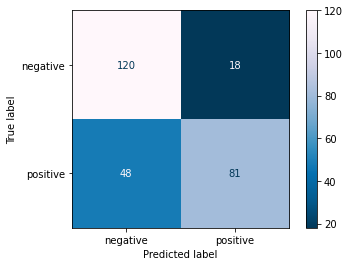

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=classes)
cm_display = ConfusionMatrixDisplay(cm, display_labels=classes).plot(cmap="PuBu_r", values_format='d') 

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
percent = accuracy * 100
del report['accuracy']

print("\nTest Count :", y_test.shape[0])
print("Correct Prediction :", (y_test == y_pred).sum())
print("Accuracy : {:.2f}%\n".format(percent))

df_report = pd.DataFrame(data=report)
df_report


Test Count : 267
Correct Prediction : 201
Accuracy : 75.28%



,negative,positive,macro avg,weighted avg
precision,0.714286,0.818182,0.766234,0.764483
recall,0.869565,0.627907,0.748736,0.752809
f1-score,0.784314,0.710526,0.747420,0.748664
support,138.000000,129.000000,267.000000,267.000000
